In [1]:
import ee   # Google EarthEngine API

import numpy as np
import matplotlib.pyplot as plt

In [18]:
import pandas as pd

In [2]:
ee.Initialize()

# sample a point from image

In [3]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 30).first().get('elevation').getInfo()
print('Mount Everest elevation (m):', elev)

Mount Everest elevation (m): 8729


In [6]:
# Print the elevation of Mount Everest.
dem = ee.Image('USGS/SRTMGL1_003')
xy = ee.Geometry.Point([86.9250, 27.9881])
elev = dem.sample(xy, 300).first().get('elevation').getInfo()
print('Mount Everest elevation (m), sampling from a larger area:', elev)

Mount Everest elevation (m), sampling from a larger area: 8678


# Select a series from AVHRR

In [33]:
avhrr_col = ee.ImageCollection('NOAA/CDR/AVHRR/SR/V5')
avhrr_b2 = avhrr_col.filter(ee.Filter.date('1985-01-01', '1986-01-01')).select('SREFL_CH2')

In [34]:
zunyi = [107,28]  # sub-tropical
hlj = [129, 47.5] # temperate
amazon1 = [-65, -5] # tropical rainforest

In [35]:
# select a point 
point = ee.Geometry.Point(zunyi)  # lon-lat
geom_val = avhrr_b2.filterBounds(
    point).getRegion(
    geometry=point, scale=30)

In [36]:
# Not necessary to convert to ee.List
geom_val_list = ee.List(geom_val).getInfo()

In [37]:
df1 = pd.DataFrame(geom_val_list[1:], columns = geom_val_list[0])

In [38]:
df1['datetime'] = pd.to_datetime(df1['time'], unit='ms', utc=True)

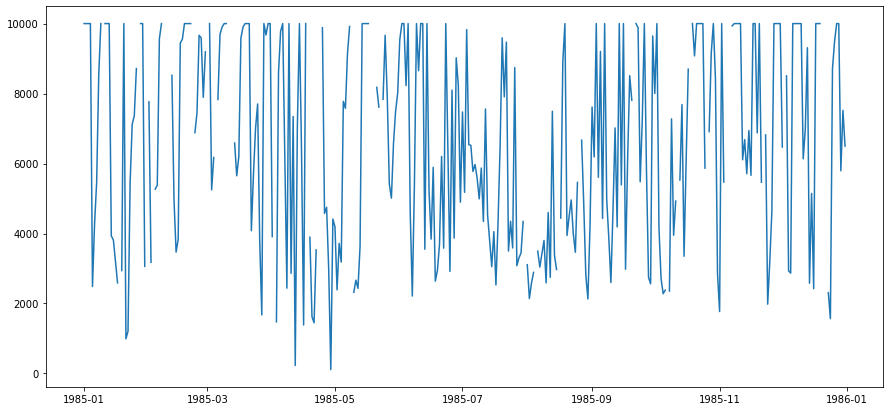

In [39]:
plt.rcParams['figure.figsize'] = (15,7)
plt.plot(df1['datetime'], df1['SREFL_CH2'])